In [1]:
!pip install graphviz

In [37]:
from graphviz import Digraph

def visualize_tree(tree):
    if tree is None:
        return "Nothing in the tree!"
    def add_nodes_edges(tree, dot=None):
        if dot is None:
            dot = Digraph()
            dot.attr('node', shape='circle')
            dot.node(name=str(tree), label=str(tree.value))
            
        for child in [tree.left, tree.right]:
            if child is not None:
                if child == tree.left:
                    dot.attr('node', shape='circle', style='filled', fillcolor='lightblue')
                if child == tree.right:
                    dot.attr('node', shape='doublecircle', style='filled', fillcolor='seashell')
                dot.node(name=str(child), label=str(child.value))    
                dot.edge(str(tree), str(child))
                dot = add_nodes_edges(child, dot=dot)
        return dot
    
    dot = add_nodes_edges(tree)
    
    display(dot)

In [38]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        
    #depth-first-search
    def dfs(self): #preorder
        print(self.value)
    
        if self.left:
            self.left.dfs()
    
        if self.right:
            self.right.dfs()
            
    def dfs_inorder(self): #inorder
        if self.left:
            self.left.dfs_inorder()
            
        print(self.value)
        
        if self.right:
            self.right.dfs_inorder()
            
    def dfs_postorder(self):  #postorder
        if self.left:
            self.left.dfs_postorder()
            
        if self.right:
            self.right.dfs_postorder()
            
        print(self.value)

    #breadth-first-search
    def bfs(self):
        to_visit = [self]
        
        while to_visit:
            current = to_visit.pop(0)
            
            print(current.value)
            
            if current.left:
                to_visit.append(current.left)
            
            if current.right:
                to_visit.append(current.right)
            
    def dfs_apply(self, fn):
        #calling function on whole tree because sum is made in PerfectSum class which handles each node
        #preorder
        fn(self)  
        
        if self.left:
            self.left.dfs_apply(fn)
            
        if self.right:
            self.right.dfs_apply(fn)
            
class PerformSum:
    def __init__(self):
        self.sum = 0
    
    def process(self, node):
        #print(node.value)
        self.sum = self.sum + node.value
        
    def get_sum(self):
        return self.sum
    
    def reset_sum(self):
        self.sum = 0

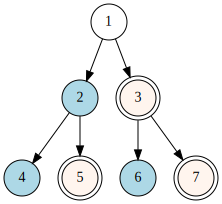

28


In [39]:
t1 = TreeNode(1)
t1.left = TreeNode(2)
t1.right = TreeNode(3)
t1.left.left = TreeNode(4)
t1.left.right = TreeNode(5)
t1.right.left = TreeNode(6)
t1.right.right = TreeNode(7)
visualize_tree(t1)

p = PerformSum()
t1.dfs_apply(p.process)
print(p.get_sum())
p.reset_sum()